In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential, Model
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation, Conv2D, MaxPooling2D, BatchNormalization, Concatenate
from keras.layers import Reshape, MaxPooling2D, Lambda, SeparableConv2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
import tensorflow as tf
from keras.layers.merge import concatenate

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_rows, img_cols, img_channels =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

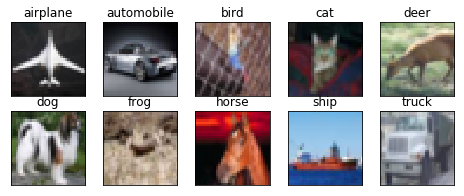

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

# Assignment 6B - Advanced Convolutions

In [0]:
def space_to_depth_x2(x):
    return tf.space_to_depth(x, block_size=2)

In [0]:
# Define the model

# Model:
# Initial Convolution: Normal
# Conv(16, 3, 3, same padding) + BN

#Conv Block 1
  # Spatially Separable Convolution:
  # Conv(16, 3, 1, same padding) + BN
  # Conv(16, 1, 3, same padding) + BN

  # Depthwise Separable Convolution
  # Conv(32, 3, 3, same padding) + BN

# Transition Block 1
  #MaxPool + Conv (16, 1, 1) + BN + DropOut | Output: 16
  
  
  
  

#------------------------------------------------------------------------------#

input = Input(shape = (img_rows, img_cols, img_channels))

# Initial Conv
layer1 = Conv2D(16, (3, 3), strides=(1,1), padding='same', activation='relu', name= 'Initial_Conv')(input)
layer1 = BatchNormalization(name= 'Initial_Conv_BN')(layer1)

# Convolution Block 1
# Spatially Separable Convolution
layer2 = Conv2D(16, (3, 1), strides=(1,1), padding='same', activation='relu', name= 'Spatial_Sep_3_1')(layer1)
layer2 = BatchNormalization(name= 'Spatial_Sep_3_1_BN')(layer2)

layer2 = Conv2D(16, (1, 3), strides=(1,1), padding='same', activation='relu', name= 'Spatial_Sep_1_3')(layer2)
layer2 = BatchNormalization(name= 'Spatial_Sep_1_3_BN')(layer2)

# Depthwise Separable Convolution
layer3 = SeparableConv2D(32, (3, 3), strides=(1,1), padding='same', activation='relu', name= 'Depth_Sep')(layer2)
layer3 = BatchNormalization(name='Depth_Sep_BN')(layer3)

# Transition Block 1
layer4 = MaxPooling2D(pool_size=(2, 2), name = 'MaxPool_1')(layer3)
layer4 = Conv2D(16, (1, 1), strides=(1,1), padding='same', activation='relu', name= 'Transition_Conv_1')(layer4)
layer4 = BatchNormalization(name= 'Transition_Conv_1_BN')(layer4)
layer4 = Dropout(0.25, name = 'Transition_Conv_1_D')(layer4)

# Convolution Block 2
# Grouped Convolution (Kernel size 3 and 5)
# Kernel 3
layer5 = Conv2D(32, (3, 3), strides=(1,1), padding='same', activation='relu', name= 'Group_3_1')(layer4)
layer5 = BatchNormalization(name= 'Group_3_1_BN')(layer5)

layer6 = Conv2D(64, (3, 3), strides=(1,1), padding='same', activation='relu', name= 'Group_3_2')(layer5)
layer6 = BatchNormalization(name= 'Group_3_2_BN')(layer6)

# Kernel 5
layer7 = Conv2D(32, (5, 5), strides=(1,1), padding='same', activation='relu', name= 'Group_5_1')(layer4)
layer7 = BatchNormalization(name= 'Group_5_1_BN')(layer7)

layer8 = Conv2D(64, (5, 5), strides=(1,1), padding='same', activation='relu', name= 'Group_5_2')(layer7)
layer8 = BatchNormalization(name= 'Group_5_2_BN')(layer7)

# Concatenation
layer9 = concatenate([layer6, layer8])

# Transition Block 2
layer10 = MaxPooling2D(pool_size=(2, 2), name = 'MaxPool_2')(layer9)
layer10 = Conv2D(32, (1, 1), strides=(1,1), padding='same', activation='relu', name= 'Transition_Conv_2')(layer10)
layer10 = BatchNormalization(name= 'Transition_Conv_2_BN')(layer10)
layer10 = Dropout(0.25, name = 'Transition_Conv_2_D')(layer10)

# Convolution Block 3
# Grouped Convolution (Dilation 1 and 2)
# Dilation = 1
layer11 = Conv2D(64, (3, 3), strides=(1,1), padding='same', dilation_rate=(1, 1), activation='relu', name= 'Group_D1_1')(layer10)
layer11 = BatchNormalization(name= 'Group_D1_1_BN')(layer11)

layer12 = Conv2D(128, (3, 3), strides=(1,1), padding='same', dilation_rate=(1, 1), activation='relu', name= 'Group_D1_2')(layer11)
layer12 = BatchNormalization(name= 'Group_D1_2_BN')(layer12)

# Dilation = 2
layer13 = Conv2D(64, (3, 3), strides=(1,1), padding='same', dilation_rate=(2, 2), activation='relu', name= 'Group_D2_1')(layer10)
layer13 = BatchNormalization(name= 'Group_D2_1_BN')(layer13)

layer14 = Conv2D(128, (3, 3), strides=(1,1), padding='same', dilation_rate=(2, 2), activation='relu', name= 'Group_D2_2')(layer13)
layer14 = BatchNormalization(name= 'Group_D2_2_BN')(layer14)

# Concatenation
layer15 = concatenate([layer12, layer14])

# Transition Block 3
layer16 = MaxPooling2D(pool_size=(2, 2), name = 'MaxPool_3')(layer15)
layer16 = Conv2D(64, (1, 1), strides=(1,1), padding='same', activation='relu', name= 'Transition_Conv_3')(layer16)
layer16 = BatchNormalization(name= 'Transition_Conv_3_BN')(layer16)
layer16 = Dropout(0.25, name = 'Transition_Conv_3_D')(layer16)

# Final Conv: 10 channels to bring down dimension to 1X1
layer17 = Conv2D(10, (4, 4), strides=(1,1), name= 'Final_Conv')(layer16)

# Flatten
layer18 = Flatten()(layer17)

# Output
output = Activation("softmax")(layer18)



W0617 14:46:57.463161 140002317178752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0617 14:46:57.480297 140002317178752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0617 14:46:57.487613 140002317178752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0617 14:46:57.521910 140002317178752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0617 14:46:57.523179 1400023171

In [0]:
model = Model(inputs=[input], outputs=[output])
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
Initial_Conv (Conv2D)           (None, 32, 32, 16)   448         input_1[0][0]                    
__________________________________________________________________________________________________
Initial_Conv_BN (BatchNormaliza (None, 32, 32, 16)   64          Initial_Conv[0][0]               
__________________________________________________________________________________________________
Spatial_Sep_3_1 (Conv2D)        (None, 32, 32, 16)   784         Initial_Conv_BN[0][0]            
__________________________________________________________________________________________________
Spatial_Se

In [0]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0617 14:47:08.210568 140002317178752 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':
W0617 14:47:10.493505 140002317178752 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will

Epoch 1/50
390/390 [==============================] - 40s 103ms/step - loss: 1.6794 - acc: 0.4144 - val_loss: 1.3929 - val_acc: 0.5007
Epoch 2/50
390/390 [==============================] - 33s 85ms/step - loss: 1.2784 - acc: 0.5414 - val_loss: 1.4146 - val_acc: 0.5230
Epoch 3/50
390/390 [==============================] - 33s 84ms/step - loss: 1.1105 - acc: 0.6022 - val_loss: 1.0120 - val_acc: 0.6388
Epoch 4/50
390/390 [==============================] - 33s 85ms/step - loss: 0.9842 - acc: 0.6503 - val_loss: 0.9935 - val_acc: 0.6486
Epoch 5/50
390/390 [==============================] - 33s 84ms/step - loss: 0.8869 - acc: 0.6855 - val_loss: 0.8762 - val_acc: 0.6953
Epoch 6/50
390/390 [==============================] - 33s 84ms/step - loss: 0.8074 - acc: 0.7145 - val_loss: 0.8657 - val_acc: 0.6939
Epoch 7/50
390/390 [==============================] - 33s 84ms/step - loss: 0.7423 - acc: 0.7364 - val_loss: 0.8379 - val_acc: 0.7072
Epoch 8/50
390/390 [==============================] - 33s 84m

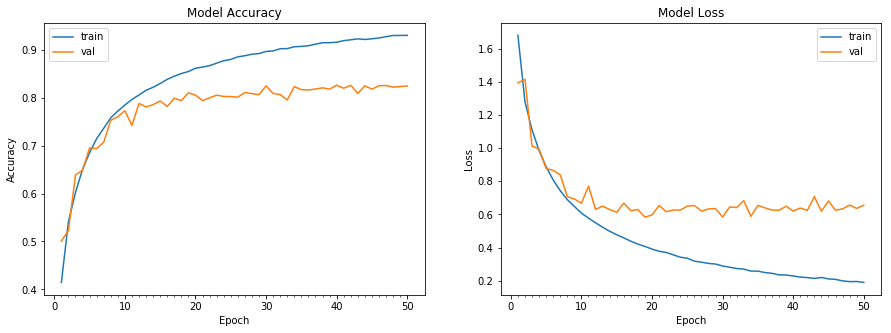

Accuracy on test data is: 82.45


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))